In [1]:
import mido
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import time
import pickle

In [2]:
def getData(data_folder):
    """
    Walk through a folder, appending to a list only MID files
    :param data_folder: the base data folder used in the model, still nonrepresentative
    :return all_mid: the list of MID in the folder
    """
    notes = {}
    i = 0
    
    for dirpath, _, filenames in os.walk(data_folder):
        for File in filenames:
            path = os.path.join(dirpath, File)

            try:
                mid = mido.MidiFile(path)

                tpb = mid.ticks_per_beat
                duration = mid.length
                
                if tpb not in [96, 120, 192, 240, 256, 384, 480, 960, 1024]:
                    continue
                if 10 < duration < 600:
                    tracks = mido.merge_tracks(mid.tracks)
                    
                    for msg in tracks:
                        if msg.is_meta:
                            continue 
                        if msg.type == "sysex":
                            continue
                        if msg.type == "note_on":
                            note = msg.note
                            if note not in notes:
                                notes[note] = 1
                                continue
                            notes[note] += 1
                            
            except:
                print(path)
                continue
            i+=1
            if i % 250 == 0:
                print(i)
    return notes

In [3]:
# start_time = time.time()

# notes_dict = getData("Dataset")

# a_file = open("notes.pkl", "wb")
# pickle.dump(notes_dict, a_file)
# a_file.close()

# print("--- %s seconds ---" % (time.time() - start_time))

In [2]:
a_file = open("notesData.pkl", "rb")
output = pickle.load(a_file)

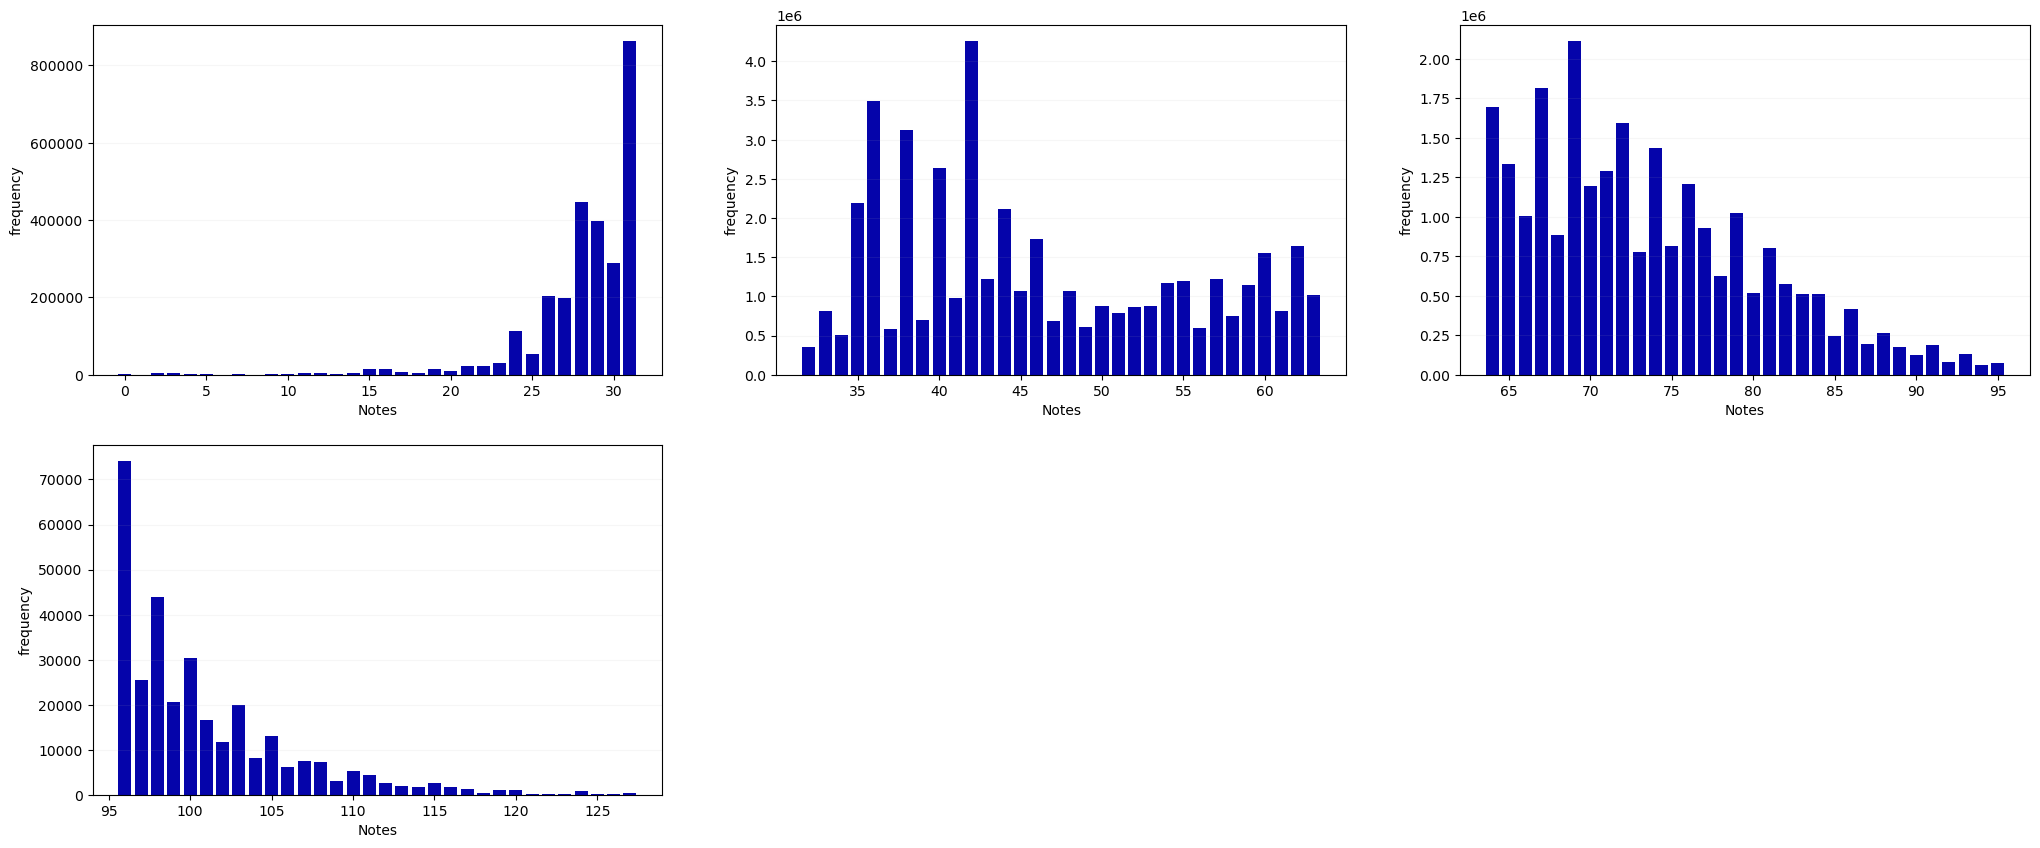

In [3]:
x = list(np.linspace(0,180,num =181).astype(int))
y = list(dict(sorted(output.items())).values())

fig = plt.figure(figsize=(25, 10))

for i in range(1,5):
    plt.subplot(2, 3, i)
    plt.bar(x[(i-1)*32:(i-1)*32 + 32], y[(i-1)*32:(i-1)*32 + 32], color='#0504aa')
    plt.grid(axis='y', alpha=0.1)
    plt.xlabel("Notes")
    plt.ylabel("frequency")

plt.show()